# Generating a Composite Stellar Population Spectrum for a Single Galaxy

In [13]:
import os
os.environ['SPS_HOME'] = 'fsps'

import fsps
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import astropy.units as u

In [2]:
sp = fsps.StellarPopulation(
    sfh=0,  # Simple stellar population
    imf_type=1  # Chabrier IMF
)

(0.0, 2.5e-13)

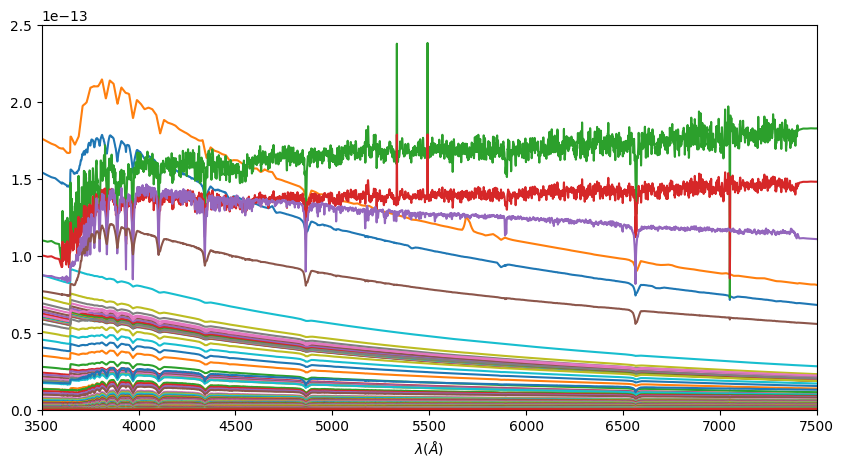

In [9]:
wav, spec = sp.get_spectrum()

plt.figure(figsize=(10, 5))
plt.plot(wav, spec.T)
plt.xlabel('$\\lambda (\\AA)$')
plt.xlim(3500,7500)
plt.ylim(0,2.5e-13)

In [99]:
ages = sp.ssp_ages
ages

array([ 5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,  5.85,  5.9 ,
        5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,  6.3 ,  6.35,
        6.4 ,  6.45,  6.5 ,  6.55,  6.6 ,  6.65,  6.7 ,  6.75,  6.8 ,
        6.85,  6.9 ,  6.95,  7.  ,  7.05,  7.1 ,  7.15,  7.2 ,  7.25,
        7.3 ,  7.35,  7.4 ,  7.45,  7.5 ,  7.55,  7.6 ,  7.65,  7.7 ,
        7.75,  7.8 ,  7.85,  7.9 ,  7.95,  8.  ,  8.05,  8.1 ,  8.15,
        8.2 ,  8.25,  8.3 ,  8.35,  8.4 ,  8.45,  8.5 ,  8.55,  8.6 ,
        8.65,  8.7 ,  8.75,  8.8 ,  8.85,  8.9 ,  8.95,  9.  ,  9.05,
        9.1 ,  9.15,  9.2 ,  9.25,  9.3 ,  9.35,  9.4 ,  9.45,  9.5 ,
        9.55,  9.6 ,  9.65,  9.7 ,  9.75,  9.8 ,  9.85,  9.9 ,  9.95,
       10.  , 10.05, 10.1 , 10.15])

In [128]:
t_bins = np.linspace(5.5, 10.15, 10)
t_spec = {}
t_avg = dict(zip(t_bins[1:], np.zeros(len(t_bins))))
t_bins

array([ 5.5       ,  6.01666667,  6.53333333,  7.05      ,  7.56666667,
        8.08333333,  8.6       ,  9.11666667,  9.63333333, 10.15      ])

In [129]:
t_avg

{6.016666666666667: 0.0,
 6.533333333333333: 0.0,
 7.050000000000001: 0.0,
 7.566666666666666: 0.0,
 8.083333333333334: 0.0,
 8.600000000000001: 0.0,
 9.116666666666667: 0.0,
 9.633333333333333: 0.0,
 10.15: 0.0}

In [130]:
spec_ages = dict(zip(ages, spec))
for key, value in spec_ages.items():
    for t in range(len(t_bins)):
        if key <= t_bins[t] and key > t_bins[t - 1]:
            t_spec.setdefault(t_bins[t], []).append(value)
    
for key, value in t_spec.items():
    t_avg[key] = np.vstack(value).mean(axis=0)

t_avg

{6.016666666666667: array([1.93625077e-25, 5.74794585e-25, 1.16450296e-24, ...,
        2.52544576e-23, 2.47926863e-23, 2.43386284e-23]),
 6.533333333333333: array([1.72114334e-25, 5.35617953e-25, 1.11264977e-24, ...,
        7.78340158e-23, 7.64107188e-23, 7.50116462e-23]),
 7.050000000000001: array([1.65050354e-27, 5.88928144e-27, 1.32134538e-26, ...,
        1.43973870e-21, 1.41342306e-21, 1.38752923e-21]),
 7.566666666666666: array([1.76078741e-37, 1.16881241e-36, 3.84917915e-36, ...,
        9.65345003e-23, 9.47693331e-23, 9.30336648e-23]),
 8.083333333333334: array([1.09254238e-42, 1.09254238e-42, 1.09254238e-42, ...,
        1.69905082e-22, 1.66674339e-22, 1.63584734e-22]),
 8.600000000000001: array([5.31294726e-21, 5.35099540e-21, 6.80348006e-21, ...,
        3.52350299e-22, 3.45121575e-22, 3.38590942e-22]),
 9.116666666666667: array([6.75528420e-21, 7.00167006e-21, 8.72636883e-21, ...,
        1.58459115e-22, 1.55529227e-22, 1.52666348e-22]),
 9.633333333333333: array([2.80224

(0.0, 3e-13)

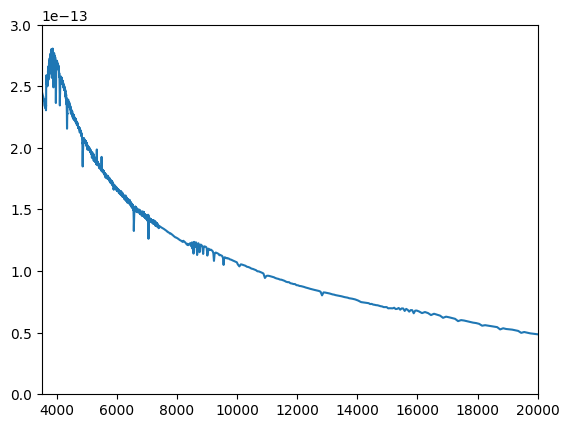

In [144]:
s = np.vstack(list(t_avg.values())).sum(axis=0)
plt.plot(wav, s)
plt.xlim(3500,20000)
plt.ylim(0,3e-13)